In [1]:
!git clone https://github.com/ahmddbilall/AI_Competition_Softec.git

Cloning into 'AI_Competition_Softec'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 364 (delta 0), reused 3 (delta 0), pack-reused 360
Receiving objects: 100% (364/364), 503.56 MiB | 25.58 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (292/292), done.


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
batch_size=32
img_height=180
img_width=180


In [5]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/AI_Competition_Softec/softec-aic-2024/Training Images',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size


)

Found 226 files belonging to 2 classes.
Using 181 files for training.


In [6]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/AI_Competition_Softec/softec-aic-2024/Training Images',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size


)

Found 226 files belonging to 2 classes.
Using 45 files for validation.


In [8]:
class_names=train_ds.class_names
print(class_names)


['Mitosis', 'Normal']


In [ ]:
## visualizing
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
AUTOTUNE=tf.data.AUTOTUNE
trian_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 1.0


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [25]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 21s 932ms/step - loss: 0.9729 - accuracy: 0.5525 - val_loss: 0.5466 - val_accuracy: 0.6889
Epoch 2/10
6/6 [==============================] - 12s 35ms/step - loss: 0.5915 - accuracy: 0.6575 - val_loss: 0.4735 - val_accuracy: 0.7778
Epoch 3/10
6/6 [==============================] - 11s 39ms/step - loss: 0.4726 - accuracy: 0.8011 - val_loss: 0.4299 - val_accuracy: 0.8444
Epoch 4/10
6/6 [==============================] - 11s 34ms/step - loss: 0.4400 - accuracy: 0.8343 - val_loss: 0.4233 - val_accuracy: 0.8444
Epoch 5/10
6/6 [==============================] - 12s 34ms/step - loss: 0.4599 - accuracy: 0.8066 - val_loss: 0.4303 - val_accuracy: 0.7778
Epoch 6/10
6/6 [==============================] - 12s 36ms/step - loss: 0.4284 - accuracy: 0.8398 - val_loss: 0.4106 - val_accuracy: 0.8444
Epoch 7/10
6/6 [==============================] - 12s 35ms/step - loss: 0.3853 - accuracy: 0.8564 - val_loss: 0.4122 - val_accuracy: 0.8444
Epoch 8/10
6/6 [===

In [30]:


# Specify the path where you want to save the model
model_path = '/content/AI_Competition_Softec/softec-aic-2024/model.h5'

# Save the model to the specified path
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


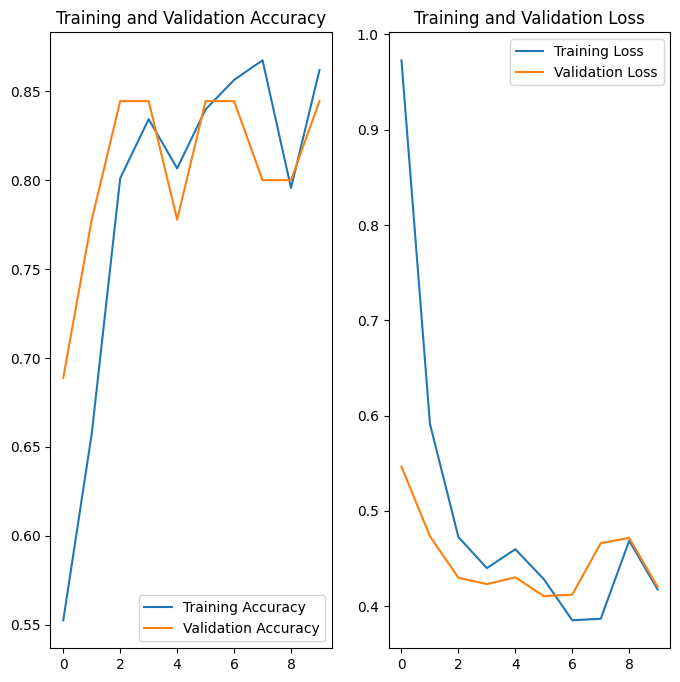

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
import os
import tensorflow as tf
import numpy as np

folder_path = "/content/AI_Competition_Softec/softec-aic-2024/Testing Images"


image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".jpg")]


model = tf.keras.models.load_model('/content/AI_Competition_Softec/softec-aic-2024/model.h5')


img_height, img_width = 180,180

predictions = []


for image_file in image_files:

    img = tf.keras.utils.load_img(image_file, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    prediction = model.predict(img_array)


    prediction_label = "Mitosis" if prediction[0][0] > 0.5 else "Normal"

    predictions.append(prediction_label)


predictions_array = np.array(predictions)

print(predictions_array)


1/1 [==============================] - 0s 21ms/step
['Mitosis' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Mitosis' 'Normal'
 'Normal' 'Mitosis' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Mitosis' 'Normal' 'Mitosis' 'Normal' 'Mitosis' 'Normal'
 'Mitosis' 'Normal' 'Normal' 'Normal' 'Mitosis' 'Normal' 'Mitosis'
 'Mitosis' 'Mitosis' 'Normal' 'Mitosis' 'Mitosis' 'Mitosis' 'Normal'
 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Mitosis'
 'Mitosis' 'Mitosis' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Mitosis'
 'Normal' 'Normal' 'Normal' 'Normal' 'Mitosis' 'Normal' 'Normal']


In [36]:
import pandas as pd

test = pd.read_csv('/content/AI_Competition_Softec/softec-aic-2024/Test.csv')
test['Label'] = predictions

# Convert probability predictions to class labels

test.to_csv('predictions.csv')